# Cyclist EDA

### Goal: Understand how casual riders and annual members use Cyclistic bikes differently. Design a new marketing strategy to convert casual riders into annual members.

## Setup

In [1]:
%pip uninstall -y lida 
%pip install -U python-dotenv
%pip install -U llmx
%pip install pandas
%pip install matplotlib
%pip install plotly
%pip install seaborn
# !pip install lida[infographics] # for infographics support

Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip show lida

Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys
import os
import pprint
import pickle
from dotenv import load_dotenv

load_dotenv()

True

In [7]:
sys.path.append(os.path.abspath('../..'))

In [8]:
from lida.components.manager import Manager
from llmx import TextGenerationConfig, llm

In [9]:
lida = Manager(text_gen = llm("openai", api_key=os.getenv("APIKEY")))
textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-4o-mini", use_cache=True)

## Summarize Data

### Summarize

In [14]:
summary = lida.summarize("../cyclist.csv", summary_method="default", textgen_config=textgen_config)  
pprint.pprint(summary)

{'dataset_description': '',
 'field_names': ['ride_id',
                 'rideable_type',
                 'started_at',
                 'ended_at',
                 'start_station_name',
                 'start_station_id',
                 'end_station_name',
                 'end_station_id',
                 'start_lat',
                 'start_lng',
                 'end_lat',
                 'end_lng',
                 'member_casual'],
 'fields': [{'column': 'ride_id',
             'properties': {'description': '',
                            'dtype': 'string',
                            'num_unique_values': 4500,
                            'samples': ['8ECFDC958F0F25FD',
                                        'C0814B7429138063',
                                        '44BAC1C31EA6A6C8'],
                            'semantic_type': ''}},
            {'column': 'rideable_type',
             'properties': {'description': '',
                            'dtype': 'category',


# Generate General Goals

### Generate Goals without a Persona

In [15]:
goals = lida.goals(summary, n=20, textgen_config=textgen_config)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** How do the rideable types compare in terms of total rides?

**Visualization:** `bar chart of rideable_type vs. count`

**Rationale:** This visualization will show the distribution of rides across the different rideable types (classic_bike, electric_bike, docked_bike) using the 'rideable_type' field. A bar chart is chosen for its effectiveness in comparing quantities across categories, allowing us to identify which bike type is the most popular among riders.



### Goal 1
---
**Question:** What are the most popular start stations for bike rides?

**Visualization:** `bar chart of start_station_name vs. count`

**Rationale:** By visualizing the counts of rides starting from each station using the 'start_station_name' field, we can identify the most frequented locations for bike rentals. A bar chart is appropriate here to clearly compare the number of rides per station, highlighting trends in rider behavior and station usage.



### Goal 2
---
**Question:** What is the distribution of bike ride types between members and casual riders?

**Visualization:** `bar chart of member_casual vs. count`

**Rationale:** This visualization will utilize the 'member_casual' field to compare the number of rides taken by members versus casual riders. A bar chart is chosen to effectively illustrate the differences in ride frequency between these two groups, providing insights into the user demographics of the bike rental service.



### Goal 3
---
**Question:** Which end stations have the highest ride counts?

**Visualization:** `bar chart of end_station_name vs. count`

**Rationale:** Using the 'end_station_name' field, this visualization will help us understand which stations are most frequently used as endpoints for rides. A bar chart is suitable here, allowing for an easy comparison of ride counts across different stations and revealing patterns in rider destinations.



### Goal 4
---
**Question:** How do the number of rides vary over the month of June 2021?

**Visualization:** `bar chart of COUNT(ride_id) grouped by DATE(started_at)`

**Rationale:** This visualization will show the daily distribution of rides throughout June 2021, allowing us to identify trends, peak days, and patterns in cycling activity. The 'started_at' field is used to group the rides by date, which is essential for understanding temporal patterns.



### Goal 5
---
**Question:** What is the average duration of rides per day in June 2021?

**Visualization:** `line chart of AVERAGE(TIMESTAMPDIFF(SECOND, started_at, ended_at)) grouped by DATE(started_at)`

**Rationale:** This visualization will provide insights into how ride durations change over the month. By calculating the difference between 'ended_at' and 'started_at', we can analyze the average ride duration per day, which can help identify factors influencing ride lengths.



### Goal 6
---
**Question:** What are the ride patterns for members vs casual users over June 2021?

**Visualization:** `stacked bar chart of COUNT(ride_id) grouped by DATE(started_at) and member_casual`

**Rationale:** This visualization will allow us to compare the number of rides taken by members versus casual users on a daily basis. By using the 'member_casual' field alongside 'started_at', we can track user engagement and preferences over time.



### Goal 7
---
**Question:** On which days do users prefer electric bikes compared to classic bikes?

**Visualization:** `bar chart of COUNT(ride_id) grouped by DATE(started_at) and rideable_type`

**Rationale:** This visualization will highlight the preference for different bike types over the month. By analyzing the 'rideable_type' field in conjunction with 'started_at', we can see trends in bike usage, which may indicate user preferences or external factors affecting bike choice.



### Goal 8
---
**Question:** What is the distribution of ride durations?

**Visualization:** `bar chart of COUNT(ride_id) grouped by (ended_at - started_at)`

**Rationale:** This visualization will help us understand how long rides are on average, revealing patterns in user behavior related to ride duration. By calculating the duration using the 'started_at' and 'ended_at' fields, we can identify peak times for shorter or longer rides, which can inform operational strategies.



### Goal 9
---
**Question:** How do ride counts vary by starting latitude?

**Visualization:** `scatter plot of COUNT(ride_id) vs. start_lat`

**Rationale:** A scatter plot will allow us to visualize the relationship between the starting latitude of rides and the number of rides taken. This can help identify popular starting locations and geographic trends in cycling behavior, using the 'start_lat' field to pinpoint where cyclists are beginning their rides.



### Goal 10
---
**Question:** What is the average ride duration for different rideable types?

**Visualization:** `bar chart of AVG(ended_at - started_at) grouped by rideable_type`

**Rationale:** This visualization will provide insights into how different types of bikes (e.g., classic, electric, docked) affect ride duration. By aggregating the ride durations calculated from 'started_at' and 'ended_at', we can assess which bike types are preferred for longer or shorter rides, informing fleet management and marketing strategies.



### Goal 11
---
**Question:** What is the relationship between start longitude and ride counts?

**Visualization:** `heat map of COUNT(ride_id) vs. start_lng and start_lat`

**Rationale:** Using a heat map to visualize the density of rides based on starting longitude and latitude will reveal geographic hotspots for cycling activity. This visualization utilizes the 'start_lng' and 'start_lat' fields to highlight areas with high ride volumes, which can guide infrastructure investments and promotional efforts.



### Goal 12
---
**Question:** How does the rideable type influence the duration of rides based on the start and end times?

**Visualization:** `bar chart of rideable_type vs. (ended_at - started_at)`

**Rationale:** This visualization will help us understand the average ride duration for different types of bikes (classic_bike, electric_bike, docked_bike). By comparing the rideable_type with the calculated duration (ended_at - started_at), we can identify trends in ride behavior and preferences among different bike types.



### Goal 13
---
**Question:** What is the relationship between the start and end station locations and the type of cyclist (member vs. casual)?

**Visualization:** `scatter plot of start_lng vs. start_lat colored by member_casual`

**Rationale:** This scatter plot will visualize the geographic distribution of cyclists based on their type (member or casual) at their starting locations. By mapping start_lng and start_lat, we can identify patterns in where different types of cyclists tend to start their rides, which could inform station placement and marketing strategies.



### Goal 14
---
**Question:** How do the starting and ending locations of rides differ for casual versus member cyclists?

**Visualization:** `heatmap of start_lat vs. start_lng, with intensity based on member_casual`

**Rationale:** Using a heatmap will allow us to visualize the density of rides based on starting locations and differentiate between casual and member cyclists. This will help in understanding the popular routes and areas frequented by each type of cyclist, which can be useful for resource allocation and urban planning.



### Goal 15
---
**Question:** What is the trend of ride frequency over the month of June 2021, segmented by cyclist type?

**Visualization:** `line chart of count of ride_id over time, segmented by member_casual`

**Rationale:** This line chart will show the daily count of rides throughout June 2021, segmented by cyclist type (member or casual). This visualization will help us understand how the usage of the bike-sharing service varies over time and whether there are specific days when one type of cyclist is more active than the other.



### Goal 16
---
**Question:** How does the rideable type affect the duration of rides?

**Visualization:** `box plot of (ended_at - started_at) grouped by rideable_type`

**Rationale:** This visualization uses the 'rideable_type' and the duration calculated from 'ended_at' and 'started_at' to show how different bike types may influence ride duration. A box plot is chosen to visualize the distribution and identify any outliers effectively.



### Goal 17
---
**Question:** What is the relationship between the start station and the type of rider (member vs casual)?

**Visualization:** `stacked bar chart of start_station_name by member_casual`

**Rationale:** This visualization utilizes 'start_station_name' and 'member_casual' to explore how different stations cater to different types of riders. A stacked bar chart is appropriate here as it allows for easy comparison of the counts of members and casual riders across various stations.



### Goal 18
---
**Question:** Is there a correlation between the starting latitude and the type of bike used?

**Visualization:** `scatter plot of start_lat vs rideable_type`

**Rationale:** This scatter plot uses 'start_lat' and 'rideable_type' to examine if there is a geographical trend in the choice of bike types. A scatter plot is suitable for visualizing the relationship between two continuous variables and categorical variable, allowing us to identify any patterns.



### Goal 19
---
**Question:** How do ride durations differ between casual and member riders?

**Visualization:** `violin plot of (ended_at - started_at) by member_casual`

**Rationale:** This visualization employs 'member_casual' and the duration calculated from 'ended_at' and 'started_at' to show the distribution of ride durations for casual and member riders. A violin plot is chosen as it combines the box plot and density plot, providing insights into the distribution and central tendency of ride durations for both groups.


### Saving and Loading Goals without a Persona

In [17]:
# # SAVE

# with open('goals-no-persona.pkl', 'wb') as f:
#     pickle.dump(goals, f)

In [19]:
# LOAD

with open('./cyclist/goals-no-persona.pkl', 'rb') as f:
    goals = pickle.load(f)

display(goals)

[Goal(question='How do the rideable types compare in terms of total rides?', visualization='bar chart of rideable_type vs. count', rationale="This visualization will show the distribution of rides across the different rideable types (classic_bike, electric_bike, docked_bike) using the 'rideable_type' field. A bar chart is chosen for its effectiveness in comparing quantities across categories, allowing us to identify which bike type is the most popular among riders.", index=0),
 Goal(question='What are the most popular start stations for bike rides?', visualization='bar chart of start_station_name vs. count', rationale="By visualizing the counts of rides starting from each station using the 'start_station_name' field, we can identify the most frequented locations for bike rentals. A bar chart is appropriate here to clearly compare the number of rides per station, highlighting trends in rider behavior and station usage.", index=1),
 Goal(question='What is the distribution of bike ride ty

### Generate Goals with a Persona

In [20]:
# goals can also be based on a persona 
persona = "a data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations."
personal_goals = lida.goals(summary, n=20, persona=persona, textgen_config=textgen_config)
for goal in personal_goals:
    display(goal)


### Goal 0
---
**Question:** How do the rideable types differ between casual riders and annual members?

**Visualization:** `bar chart of rideable_type grouped by member_casual`

**Rationale:** This visualization uses the 'rideable_type' and 'member_casual' fields to show the distribution of bike types used by each rider category. Understanding preferences for bike types can help tailor marketing strategies to convert casual riders into members.



### Goal 1
---
**Question:** What are the most popular start stations for casual riders compared to annual members?

**Visualization:** `bar chart of start_station_name grouped by member_casual`

**Rationale:** This visualization leverages the 'start_station_name' and 'member_casual' fields to highlight the top starting stations for each rider type. Identifying popular stations can inform targeted marketing efforts and potential station-based promotions.



### Goal 2
---
**Question:** What is the usage trend of Cyclistic bikes over the month for casual riders vs. annual members?

**Visualization:** `line chart of count of ride_id over time (using started_at) grouped by member_casual`

**Rationale:** Using the 'started_at' and 'member_casual' fields, this line chart will depict the number of rides over time for both casual and member riders. This insight can reveal patterns in usage frequency that can be leveraged in marketing strategies.



### Goal 3
---
**Question:** How does the duration of rides differ between casual and annual members?

**Visualization:** `box plot of ride duration calculated from started_at and ended_at, grouped by member_casual`

**Rationale:** This visualization calculates ride duration using 'started_at' and 'ended_at' fields, then compares the distribution of ride durations between casual and member riders. Understanding duration differences can help tailor membership benefits to encourage longer rides among casual users.



### Goal 4
---
**Question:** How do ride durations differ between casual riders and members over the month of June?

**Visualization:** `bar chart of COUNT(ride_id) by DATE(started_at) and member_casual`

**Rationale:** This visualization will show the daily count of rides for casual riders and members throughout June. By comparing these counts, we can identify trends and peaks in usage, which will help us understand the differences in engagement between casual riders and members. A bar chart is chosen for its effectiveness in comparing quantities across categories.



### Goal 5
---
**Question:** What are the peak days of the week for bike usage among casual riders versus members?

**Visualization:** `bar chart of COUNT(ride_id) by DAYOFWEEK(started_at) and member_casual`

**Rationale:** This visualization will allow us to see which days of the week are most popular for casual riders compared to members. Understanding peak usage days can inform targeted marketing efforts. A bar chart is appropriate here as it clearly conveys the differences in usage patterns across the weekdays.



### Goal 6
---
**Question:** What is the trend of ride frequency over the month for casual riders compared to members?

**Visualization:** `line chart of COUNT(ride_id) by DATE(started_at) and member_casual`

**Rationale:** This line chart will illustrate the trend in ride frequency over the month, highlighting differences in behavior between casual riders and members. It can help identify patterns over time, such as whether members ride consistently or have specific peaks. Line charts are effective for showing trends over time.



### Goal 7
---
**Question:** What is the average ride duration for casual riders versus members throughout June?

**Visualization:** `box plot of (ended_at - started_at) by member_casual`

**Rationale:** This box plot will provide insights into the distribution of ride durations for casual riders and members. By comparing the medians and ranges, we can see if one group tends to have longer or shorter rides, which could impact marketing strategies. Box plots are chosen for their ability to show distribution and outliers effectively.



### Goal 8
---
**Question:** What is the average ride duration for casual riders compared to annual members?

**Visualization:** `bar chart comparing average ride duration by member_casual`

**Rationale:** This visualization will use the 'member_casual' field to segment the data into casual and member categories, allowing us to calculate and compare the average ride durations. Understanding the differences in ride duration can provide insights into usage patterns and preferences, which is crucial for tailoring marketing strategies.



### Goal 9
---
**Question:** How do the number of rides vary by rideable type for casual riders and members?

**Visualization:** `stacked bar chart of rideable_type by member_casual`

**Rationale:** This visualization will utilize the 'rideable_type' and 'member_casual' fields to show the distribution of rideable types among casual and member riders. Analyzing this can help identify which types of bikes are more appealing to each group, guiding marketing efforts to promote specific bike types.



### Goal 10
---
**Question:** What is the trend of rides over the month for casual riders versus annual members?

**Visualization:** `line chart of ride counts over time by member_casual`

**Rationale:** Using the 'started_at' field, we can aggregate the number of rides over the month and differentiate between casual and member riders. This trend analysis will reveal patterns in usage frequency, which can inform marketing campaigns aimed at increasing annual memberships during peak times.



### Goal 11
---
**Question:** What is the geographical distribution of rides for casual riders and members?

**Visualization:** `heat map of start_lat and start_lng by member_casual`

**Rationale:** This visualization will leverage the 'start_lat' and 'start_lng' fields to plot the origins of rides on a heat map, segmented by member type. Understanding where different rider types are concentrated can help target location-based marketing strategies to convert casual riders into members.



### Goal 12
---
**Question:** How does the rideable type influence the duration of rides for casual riders compared to members?

**Visualization:** `bar chart comparing average ride duration (calculated from started_at and ended_at) by rideable_type and member_casual`

**Rationale:** This visualization uses the fields 'rideable_type', 'started_at', and 'ended_at' to calculate the average duration of rides. By segmenting this data by 'member_casual', we can identify differences in ride preferences and durations between casual riders and members, which will inform targeted marketing strategies.



### Goal 13
---
**Question:** What are the most popular start stations for casual riders versus members?

**Visualization:** `bar chart showing the count of rides by start_station_name, grouped by member_casual`

**Rationale:** This visualization leverages the 'start_station_name' and 'member_casual' fields to display the number of rides originating from each station. Understanding which stations are preferred by each group can help in tailoring marketing efforts and promotions at specific locations.



### Goal 14
---
**Question:** How do the start and end locations differ for casual riders and members?

**Visualization:** `scatter plot showing start_lat, start_lng, and end_lat, end_lng, colored by member_casual`

**Rationale:** This visualization uses the 'start_lat', 'start_lng', 'end_lat', and 'end_lng' fields to plot the geographic usage of Cyclistic bikes. By coloring the points based on 'member_casual', we can visually assess the areas frequented by casual riders versus members, providing insights into geographic trends for marketing.



### Goal 15
---
**Question:** What time of day do casual riders and members most frequently use the bikes?

**Visualization:** `line chart showing the count of rides by hour of the day, segmented by member_casual`

**Rationale:** This visualization uses the 'started_at' field to extract the hour of the day and count the number of rides for each hour, separated by 'member_casual'. Understanding peak usage times for each group can help in scheduling marketing campaigns and optimizing bike availability.



### Goal 16
---
**Question:** How does the rideable type (classic_bike, electric_bike, docked_bike) differ between casual riders and members?

**Visualization:** `bar chart comparing rideable_type and member_casual`

**Rationale:** This visualization will help us understand the preferences of casual riders versus members regarding the type of bike they choose. By comparing the count of each rideable type for both categories, we can identify which bike types are more popular among casual riders. This insight can inform targeted marketing strategies to promote specific bike types to casual riders, potentially increasing membership conversions.



### Goal 17
---
**Question:** What is the average ride duration for casual riders compared to members?

**Visualization:** `bar chart comparing average ride duration calculated from started_at and ended_at for member_casual`

**Rationale:** By calculating the average ride duration for casual and member categories, we can gain insights into how long each group typically rides. This information can help us tailor marketing messages that resonate with each group, encouraging casual riders to consider the benefits of longer rides which may be more feasible with an annual membership.



### Goal 18
---
**Question:** What are the most popular start and end stations for casual riders versus members?

**Visualization:** `stacked bar chart showing start_station_name and end_station_name segmented by member_casual`

**Rationale:** This visualization will reveal the most frequently used start and end stations for casual riders and members. Understanding station preferences can help us identify areas where we might increase visibility or offer promotions to casual riders, encouraging them to transition to annual memberships based on convenience.



### Goal 19
---
**Question:** What is the temporal distribution of rides for casual riders compared to members throughout the month?

**Visualization:** `line chart showing count of rides over time segmented by member_casual using started_at`

**Rationale:** This line chart will illustrate how ride patterns differ over the month for casual riders and members. By analyzing the temporal trends, we can identify peak usage times for each group, allowing us to strategically plan marketing campaigns that target casual riders during their most active times, thereby increasing the likelihood of converting them into members.


### Saving and Loading Goals with a Persona

In [21]:
# # SAVE

# with open('goals-persona.pkl', 'wb') as f:
#     pickle.dump(personal_goals, f)

In [79]:
# LOAD

with open('./cyclist/goals-persona.pkl', 'rb') as f:
    personal_goals = pickle.load(f)

display(personal_goals)

[Goal(question='How do the rideable types differ between casual riders and annual members?', visualization='bar chart of rideable_type grouped by member_casual', rationale="This visualization uses the 'rideable_type' and 'member_casual' fields to show the distribution of bike types used by each rider category. Understanding preferences for bike types can help tailor marketing strategies to convert casual riders into members.", index=0),
 Goal(question='What are the most popular start stations for casual riders compared to annual members?', visualization='bar chart of start_station_name grouped by member_casual', rationale="This visualization leverages the 'start_station_name' and 'member_casual' fields to highlight the top starting stations for each rider type. Identifying popular stations can inform targeted marketing efforts and potential station-based promotions.", index=1),
 Goal(question='What is the usage trend of Cyclistic bikes over the month for casual riders vs. annual member

## Generate Visualizations, Prompts, and Insights

### Personal Goal 0

Question: How do the rideable types differ between casual riders and annual members?

Visualization: bar chart of rideable_type grouped by member_casual

#### Visualization: Generate 

<string>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


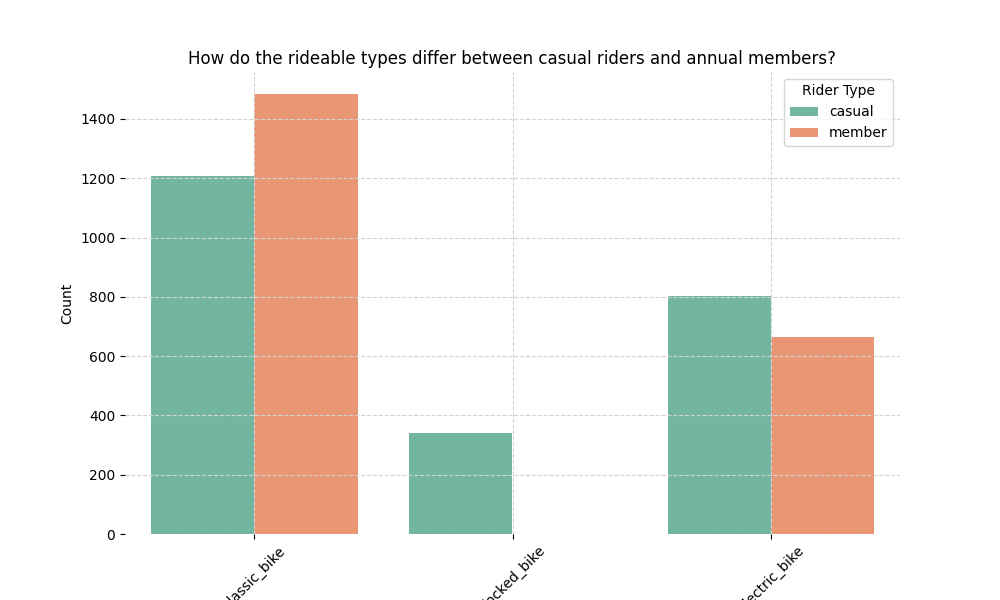

In [64]:
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
goal0_charts = lida.visualize(summary=summary, goal=personal_goals[0], textgen_config=textgen_config, library=library)  
goal0_charts[0]

#### Visualization: Save and Load

In [76]:
# # SAVE

# with open('./cyclist/goal0-personal/visualization.pkl', 'wb') as f:
#     pickle.dump(goal0_charts, f)

In [78]:
# LOAD

with open('./cyclist/goal0-personal/visualization.pkl', 'rb') as f:
    goal0_charts = pickle.load(f)

display(goal0_charts)

[ChartExecutorResponse(spec=None, status=True, raster='iVBORw0KGgoAAAANSUhEUgAAA+gAAAJYCAYAAADxHswlAAAAP3RFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMS5wb3N0MSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8kixA/AAAACXBIWXMAAA9hAAAPYQGoP6dpAACxPklEQVR4nOzdeXgV5fn/8c/MyQZkhywEIUEImCACQlUQxIWC4oZSKYqKiktVpCriUquC2qq01q1o1a+iVlyqretPRcCNXQRBgQhhC5UQCCQBApLlzPP7g+aQQxIWBWbCvF/X5SXnPpMz9zNn5jlzz/KMZYwxAgAAAAAArrLdTgAAAAAAAFCgAwAAAADgCRToAAAAAAB4AAU6AAAAAAAeQIEOAAAAAIAHUKADAAAAAOABFOgAAAAAAHgABToAAAAAAB5AgQ4AAAAAgAdQoAMAAAAA4AEU6AAAAAAAeAAFOgAAAAAAHkCBDgAAAACAB1CgAwAAAADgARToAAAAAAB4AAU6AAAAAAAeQIEOAAAAAIAHUKADAAAAAOABFOgAAAAAAHgABToAAAAAAB5AgQ4AAAAAgAdQoAMAAAAA4AEU6AAAAAAAeAAFOgAAAAAAHkCBDgAAAACAB1CgAwAAAADgARToAAAAAAB4AAU6AAAAAAAeQIEOAAAAAIAHUKADAAAAAOABFOgAAAAAAHgABToAAAAAAB5AgQ4AAAAAgAdQoAMAAAAA4AEU6AAAAAAAeAAFOgAAAAAAHkCBDgAAAACAB1CgAwAAAADgARToAAAAAAB4AAU6AAAAAAAeQIEOAAAAAIAHUKADAAAAAOABFOgAAAAAAHgABToAAAAAAB5AgQ4AAAAAgAdQoAMAAAAA4AEU6AAAAAAAeAAFOgAAAAAAHkCBDgAAAACAB1CgA42MZVkaO3bsIZ/PFVdcodjY2EM+n

#### Prompts: Generate

In [81]:
textgen_config = TextGenerationConfig(n=1, temperature=0.8, use_cache=True)
goal0_prompts = lida.prompt(personal_goals[0], textgen_config=textgen_config, n=5)  

for prompt in goal0_prompts:
    display(prompt)


### Prompt 0
---
**Question:** What is the most popular rideable type among casual riders?

**Rationale:** This tells us which bike type attracts casual riders the most, allowing us to focus marketing on these models.




### Prompt 1
---
**Question:** How does the usage of rideable types compare between casual riders and annual members?

**Rationale:** This reveals differences in preferences, which could indicate a potential area for improvement in member engagement.




### Prompt 2
---
**Question:** Are there specific rideable types that are significantly preferred by annual members compared to casual riders?

**Rationale:** Discovering these preferences can assist in developing targeted promotions aimed at casual riders to encourage membership.




### Prompt 3
---
**Question:** What trends can we observe in rideable type usage over different time periods for both member categories?

**Rationale:** Understanding seasonal trends can guide resource allocation and promotional efforts throughout the year.




### Prompt 4
---
**Question:** Does the frequency of rideable type usage differ significantly between casual riders and annual members?

**Rationale:** This insight can help identify the loyalty and engagement levels of different rider categories, potentially informing retention strategies.



#### Prompts: Save and Load

In [82]:
# # SAVE

# with open('./cyclist/goal0-personal/prompts.pkl', 'wb') as f:
#     pickle.dump(goal0_prompts, f)

In [83]:
# LOAD

with open('./cyclist/goal0-personal/prompts.pkl', 'rb') as f:
    goals0_prompts = pickle.load(f)

display(goals0_prompts)

[Prompt(question='What is the most popular rideable type among casual riders?', rationale='This tells us which bike type attracts casual riders the most, allowing us to focus marketing on these models.', index=0),
 Prompt(question='How does the usage of rideable types compare between casual riders and annual members?', rationale='This reveals differences in preferences, which could indicate a potential area for improvement in member engagement.', index=1),
 Prompt(question='Are there specific rideable types that are significantly preferred by annual members compared to casual riders?', rationale='Discovering these preferences can assist in developing targeted promotions aimed at casual riders to encourage membership.', index=2),
 Prompt(question='What trends can we observe in rideable type usage over different time periods for both member categories?', rationale='Understanding seasonal trends can guide resource allocation and promotional efforts throughout the year.', index=3),
 Prompt

#### Answers: From User

In [84]:
goal0_answers=[
    "The most popular ridable type among casual riders are classic bikes, then electric bikes, then docked bikes.",
    "None of the members use a docked type, and both casual and members use classic bikes the most, follower by electric bikes. However, more members use classic bikes over casual users, but more casual users use electric bikes over members.",
    "Well, it's not significantly preferred by annual members since the difference is only 200, but more annual members use classic bikes over casual members. Other than that, casual members use the other two types more than annual members.",
    "The chart doesn't show any information about time.",
    "They don't differ significantly."
]

#### Insights: Generate

In [85]:
goal0_insights = lida.insights(goal=personal_goals[0], answers=goal0_answers, prompts=goal0_prompts, n=10)

for insight in goal0_insights:
    display(insight)


### Insight 0
---
**Insight:** The preference for classic bikes among both casual riders and annual members suggests that this type of bike may be perceived as more reliable or versatile, potentially indicating a market opportunity for promoting classic bikes in marketing campaigns.



### Insight 1
---
**Insight:** The fact that casual riders prefer electric bikes over classic bikes, while annual members show the opposite trend, could indicate that casual riders are seeking convenience and ease of use, which electric bikes provide, while annual members may prioritize traditional biking experiences.



### Insight 2
---
**Insight:** The absence of docked bikes among both casual and annual members suggests a potential gap in the market; this could indicate that docked bikes are not meeting the needs or preferences of riders, prompting a reevaluation of their availability or marketing.



### Insight 3
---
**Insight:** The relatively small difference in classic bike usage between casual and annual members (200 users) may imply that while annual membership offers benefits, it does not significantly alter bike type preferences, suggesting that marketing strategies should focus on enhancing the value of membership.



### Insight 4
---
**Insight:** The higher usage of electric bikes among casual riders could indicate a trend towards more casual, spontaneous riding experiences, which may be influenced by urban mobility trends and the growing popularity of electric vehicles.



### Insight 5
---
**Insight:** The similar usage patterns between casual riders and annual members suggest that both groups may share common motivations for riding, such as fitness, leisure, or commuting, which could be leveraged in targeted marketing campaigns.



### Insight 6
---
**Insight:** The data indicates that while both groups prefer classic bikes, the distinct preference for electric bikes among casual riders could suggest a potential pathway for converting casual riders into annual members by promoting the benefits of classic biking experiences.



### Insight 7
---
**Insight:** The lack of significant differences in rideable type usage between casual and annual members may indicate that the current offerings are well-aligned with rider preferences, but it also raises questions about how to incentivize annual membership beyond just bike type.



### Insight 8
---
**Insight:** The trend of casual riders favoring electric bikes could reflect broader societal shifts towards sustainability and eco-friendly transportation, suggesting that marketing efforts could emphasize the environmental benefits of using electric bikes.



### Insight 9
---
**Insight:** The data suggests that while casual riders are more inclined towards electric bikes, the strong preference for classic bikes among annual members could indicate a loyalty or attachment to traditional biking culture, which could be a focal point for community-building initiatives.


#### Insights: Save and Load

In [86]:
# # SAVE

# with open('./cyclist/goal0-personal/insights.pkl', 'wb') as f:
#     pickle.dump(goal0_insights, f)

In [87]:
# LOAD

with open('./cyclist/goal0-personal/insights.pkl', 'rb') as f:
    goals0_insights = pickle.load(f)

display(goals0_insights)

[Insight(insight='The preference for classic bikes among both casual riders and annual members suggests that this type of bike may be perceived as more reliable or versatile, potentially indicating a market opportunity for promoting classic bikes in marketing campaigns.', index=0),
 Insight(insight='The fact that casual riders prefer electric bikes over classic bikes, while annual members show the opposite trend, could indicate that casual riders are seeking convenience and ease of use, which electric bikes provide, while annual members may prioritize traditional biking experiences.', index=1),
 Insight(insight='The absence of docked bikes among both casual and annual members suggests a potential gap in the market; this could indicate that docked bikes are not meeting the needs or preferences of riders, prompting a reevaluation of their availability or marketing.', index=2),
 Insight(insight='The relatively small difference in classic bike usage between casual and annual members (200 u

### Personal Goal 5

Question: What are the peak days of the week for bike usage among casual riders versus members?

Visualization: bar chart of COUNT(ride_id) by DAYOFWEEK(started_at) and member_casual

#### Visualization: Generate

<string>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


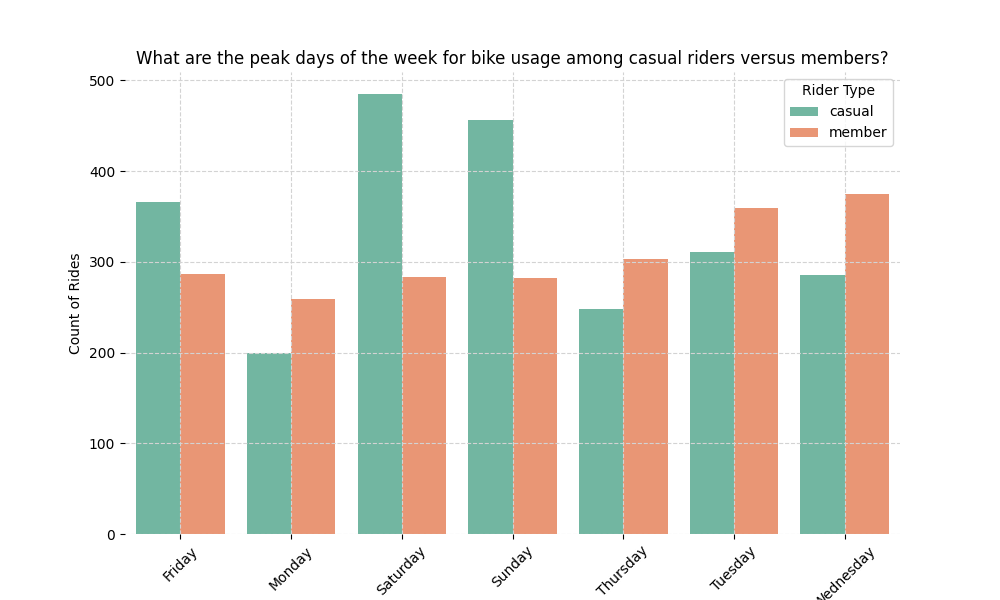

In [66]:
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
goal5_charts = lida.visualize(summary=summary, goal=personal_goals[5], textgen_config=textgen_config, library=library)  
goal5_charts[0]

#### Visualization: Save and Load

In [94]:
#### Prompts: Save and Load
# SAVE

with open('./cyclist/goal5-personal/charts.pkl', 'wb') as f:
    pickle.dump(goal5_charts, f)


In [95]:
# LOAD

with open('./cyclist/goal5-personal/charts.pkl', 'rb') as f:
    goal5_charts = pickle.load(f)

display(goal5_charts)

[ChartExecutorResponse(spec=None, status=True, raster='iVBORw0KGgoAAAANSUhEUgAAA+gAAAJYCAYAAADxHswlAAAAP3RFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMS5wb3N0MSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8kixA/AAAACXBIWXMAAA9hAAAPYQGoP6dpAACxPklEQVR4nOzdeXgV5fn/8c/MyQZkhywEIUEImCACQlUQxIWC4oZSKYqKiktVpCriUquC2qq01q1o1a+iVlyqretPRcCNXQRBgQhhC5UQCCQBApLlzPP7g+aQQxIWBWbCvF/X5SXnPpMz9zNn5jlzz/KMZYwxAgAAAAAArrLdTgAAAAAAAFCgAwAAAADgCRToAAAAAAB4AAU6AAAAAAAeQIEOAAAAAIAHUKADAAAAAOABFOgAAAAAAHgABToAAAAAAB5AgQ4AAAAAgAdQoAMAAAAA4AEU6AAAAAAAeAAFOgAAAAAAHkCBDgAAAACAB1CgAwAAAADgARToAAAAAAB4AAU6AAAAAAAeQIEOAAAAAIAHUKADAAAAAOABFOgAAAAAAHgABToAAAAAAB5AgQ4AAAAAgAdQoAMAAAAA4AEU6AAAAAAAeAAFOgAAAAAAHkCBDgAAAACAB1CgAwAAAADgARToAAAAAAB4AAU6AAAAAAAeQIEOAAAAAIAHUKADAAAAAOABFOgAAAAAAHgABToAAAAAAB5AgQ4AAAAAgAdQoAMAAAAA4AEU6AAAAAAAeAAFOgAAAAAAHkCBDgAAAACAB1CgAwAAAADgARToAAAAAAB4AAU6AAAAAAAeQIEOAAAAAIAHUKADAAAAAOABFOgAAAAAAHgABToAAAAAAB5AgQ4AAAAAgAdQoAMAAAAA4AEU6AAAAAAAeAAFOgAAAAAAHkCBDgAAAACAB1CgA42MZVkaO3bsIZ/PFVdcodjY2EM+n

#### Prompts: Generate

In [91]:
textgen_config = TextGenerationConfig(n=1, temperature=0.8, use_cache=True)
goal5_prompts = lida.prompt(personal_goals[5], textgen_config=textgen_config, n=5)  

for prompt in goal5_prompts:
    display(prompt)


### Prompt 0
---
**Question:** Which day of the week shows the highest overall bike usage?

**Rationale:** Identifying the peak day of usage will help in understanding when to allocate resources and promote services effectively.




### Prompt 1
---
**Question:** How does bike usage differ between casual riders and members on weekends versus weekdays?

**Rationale:** This will provide insights into the behavioral patterns of different rider types, aiding in customized marketing strategies.




### Prompt 2
---
**Question:** Are there any significant trends or patterns in bike usage on specific days over time?

**Rationale:** Analyzing trends can help identify if certain events or changes have influenced bike usage, guiding future operational decisions.




### Prompt 3
---
**Question:** What percentage of total bike usage does each rider type contribute on peak usage days?

**Rationale:** Understanding the share of each rider type on peak days can help tailor promotions and services to maximize engagement.




### Prompt 4
---
**Question:** How does the bike usage on the highest peak day compare to the lowest peak day for each rider type?

**Rationale:** This comparison will reveal the variability in usage and help in planning for capacity and resource allocation.



#### Prompts: Save and Load

In [92]:
# # SAVE

# with open('./cyclist/goal5-personal/prompts.pkl', 'wb') as f:
#     pickle.dump(goal5_prompts, f)

In [93]:
# LOAD

with open('./cyclist/goal5-personal/prompts.pkl', 'rb') as f:
    goals5_prompts = pickle.load(f)

display(goals5_prompts)

[Prompt(question='Which day of the week shows the highest overall bike usage?', rationale='Identifying the peak day of usage will help in understanding when to allocate resources and promote services effectively.', index=0),
 Prompt(question='How does bike usage differ between casual riders and members on weekends versus weekdays?', rationale='This will provide insights into the behavioral patterns of different rider types, aiding in customized marketing strategies.', index=1),
 Prompt(question='Are there any significant trends or patterns in bike usage on specific days over time?', rationale='Analyzing trends can help identify if certain events or changes have influenced bike usage, guiding future operational decisions.', index=2),
 Prompt(question='What percentage of total bike usage does each rider type contribute on peak usage days?', rationale='Understanding the share of each rider type on peak days can help tailor promotions and services to maximize engagement.', index=3),
 Promp

#### Answers: From User

In [96]:
goal5_answers=[
    "It seems like Saturday has the most overall bike usage, followed by sunday and then monday.",
    "On weekends, casual bike riders tend to increase compared to other casual bike rider usage in weekdays. On the other hand, members tend to be more consistent throughout the week and actually, member usage peaks on wednesdays and tuesdays and thursdays in order. This is in contrast to casual users, which peak on saturdays and sundays and fridays in order.",
    "Casual users tend to decrease as it strays away from weekends, with there being the least to most casual users on monday, thursday, wednesday, tuesday, friday, sunday and saturday in order from least to most. On the other hand, Members tend to use bicycles the most in the middle of the week with there being least to most member users on monday, saturday, friday, sunday, thursday, tuesday and wednesday in order.",
    "In peak usage days, which are saturday and sunday, casual users contribute around 5/8 of the users on saturday amd 4/7 of the users on sunday. That's just an estimate though.",
    "On the peak day of saturday, there are more casual users than members while on the least peak day of monday, there are more member users than casual users."
]

#### Insights: Generate

In [97]:
goal5_insights = lida.insights(goal=personal_goals[5], answers=goal5_answers, prompts=goal5_prompts, n=10)

for insight in goal5_insights:
    display(insight)


### Insight 0
---
**Insight:** The high bike usage on Saturdays suggests that casual riders may be using bikes for leisure activities, possibly indicating a cultural trend where weekends are reserved for recreational outings.



### Insight 1
---
**Insight:** The contrast in usage patterns between casual riders and members highlights a potential segmentation in the biking community, where casual riders are more inclined to use bikes for leisure on weekends, while members may rely on biking as a consistent mode of transportation during the week.



### Insight 2
---
**Insight:** The peak in member usage on Wednesdays could suggest that this day is favored for commuting or errands, possibly due to mid-week work patterns, while the drop in casual usage indicates a preference for weekend leisure.



### Insight 3
---
**Insight:** The significant contribution of casual users to total bike usage on weekends (5/8 on Saturday) implies that marketing efforts targeting casual riders could be more effective if focused on weekend activities, such as events or promotions.



### Insight 4
---
**Insight:** The decrease in casual riders as the week progresses may indicate that casual biking is perceived as a weekend activity, which could inform strategies for increasing weekday casual usage through targeted promotions or events.



### Insight 5
---
**Insight:** The higher member usage on Mondays compared to casual riders suggests that members may be using bikes as a reliable commuting option, indicating a potential opportunity to convert casual riders into members by promoting the benefits of membership.



### Insight 6
---
**Insight:** The pattern of member usage peaking mid-week could reflect a work-life balance trend, where individuals are more likely to bike to work during the week, suggesting that bike-sharing services could partner with local businesses to encourage this behavior.



### Insight 7
---
**Insight:** The overall trend of casual riders peaking on weekends and members peaking mid-week could indicate a need for differentiated marketing strategies that cater to the distinct motivations of each group.



### Insight 8
---
**Insight:** The observation that casual riders are less active on weekdays could suggest that there are barriers to weekday biking, such as work commitments or lack of awareness about bike-sharing options, which could be addressed through targeted outreach.



### Insight 9
---
**Insight:** The data suggests a potential opportunity for bike-sharing services to create special weekday promotions aimed at casual riders to boost usage during the week, leveraging the existing member base as advocates.


#### Insights: Save and Load

In [107]:
# # SAVE

# with open('./cyclist/goal5-personal/insights.pkl', 'wb') as f:
#     pickle.dump(goal5_insights, f)

In [108]:
# LOAD

with open('./cyclist/goal5-personal/insights.pkl', 'rb') as f:
    goal5_insights = pickle.load(f)

display(goal5_insights)

[Insight(insight='The high bike usage on Saturdays suggests that casual riders may be using bikes for leisure activities, possibly indicating a cultural trend where weekends are reserved for recreational outings.', index=0),
 Insight(insight='The contrast in usage patterns between casual riders and members highlights a potential segmentation in the biking community, where casual riders are more inclined to use bikes for leisure on weekends, while members may rely on biking as a consistent mode of transportation during the week.', index=1),
 Insight(insight='The peak in member usage on Wednesdays could suggest that this day is favored for commuting or errands, possibly due to mid-week work patterns, while the drop in casual usage indicates a preference for weekend leisure.', index=2),
 Insight(insight='The significant contribution of casual users to total bike usage on weekends (5/8 on Saturday) implies that marketing efforts targeting casual riders could be more effective if focused on

### Personal Goal 17 (Unexplored)

Question: What is the average ride duration for casual riders compared to members?

Visualization: bar chart comparing average ride duration calculated from started_at and ended_at for member_casual

In [68]:
display(personal_goals[17])


### Goal 17
---
**Question:** What is the average ride duration for casual riders compared to members?

**Visualization:** `bar chart comparing average ride duration calculated from started_at and ended_at for member_casual`

**Rationale:** By calculating the average ride duration for casual and member categories, we can gain insights into how long each group typically rides. This information can help us tailor marketing messages that resonate with each group, encouraging casual riders to consider the benefits of longer rides which may be more feasible with an annual membership.


<string>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<string>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



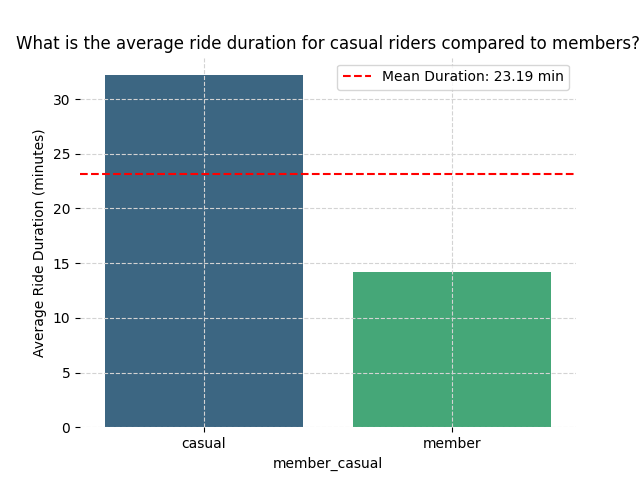

In [63]:
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
goal17_charts = lida.visualize(summary=summary, goal=personal_goals[17], textgen_config=textgen_config, library=library)  
goal17_charts[0]

### Personal Goal 15 

Question: What time of day do casual riders and members most frequently use the bikes?

Visualization: line chart showing the count of rides by hour of the day, segmented by member_casual

#### Visualization: Generate

<string>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


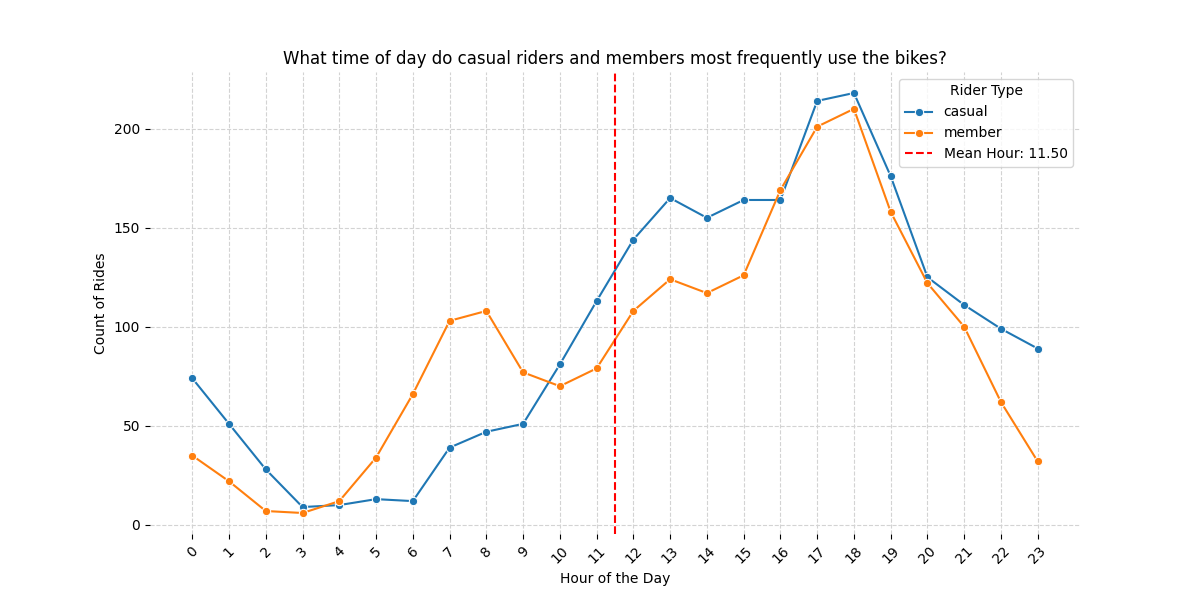

In [71]:
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
goal15_charts = lida.visualize(summary=summary, goal=personal_goals[15], textgen_config=textgen_config, library=library)  
goal15_charts[0]

#### Visualization: Save and Load

In [99]:
# # SAVE

# with open('./cyclist/goal15-personal/charts.pkl', 'wb') as f:
#     pickle.dump(goal15_charts, f)


In [100]:
# LOAD

with open('./cyclist/goal15-personal/charts.pkl', 'rb') as f:
    goal15_charts = pickle.load(f)

display(goal15_charts)

[ChartExecutorResponse(spec=None, status=True, raster='iVBORw0KGgoAAAANSUhEUgAABLAAAAJYCAYAAABy5h8aAAAAP3RFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMS5wb3N0MSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8kixA/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd3hT5d+A8TtJ23QPoGXTlraMsrcUkCnIUgTFgbIFBURQcP0ExYW4FwouQNFXAcGFgKiAMgRk79mCzLIK3SM57x+xsSEpPZ15pN/PdfWinJwm9zk5TdqnZxg0TdMQQgghhBBCCCGEEEJRRncHCCGEEEIIIYQQQghxLTKAJYQQQgghhBBCCCGUJgNYQgghhBBCCCGEEEJpMoAlhBBCCCGEEEIIIZQmA1hCCCGEEEIIIYQQQmkygCWEEEIIIYQQQgghlCYDWEIIIYQQQgghhBBCaTKAJYQQQgghhBBCCCGUJgNYQgghhBBCCCGEEEJpMoAlhBBCCCGEEEIIIZQmA1hCCCGEEEIIIYQQQmkygCWEEEIIIYQQQgghlCYDWEIIIYQQQgghhBBCaTKAJYQQQgghhBBCCCGUJgNYQgghhBBCCCGEEEJpMoAlhBBCCCGEEEIIIZQmA1hCCCGEEEIIIYQQQmkygCWEEEIIIYQQQgghlCYDWEIIIYQQQgghhBBCaTKAJYQQQgghhBBCCCGUJgNYQgghhBBCCCGEEEJpMoAlhBBCCCGEEEIIIZQmA1hCCCGEEEIIIYQQQmkygCWEEEIIIYQQQgghlCYDWEIIIYQQQgghhBBCaTKAJYQQQgghhBBCCCGUJgNYQgghhBBCCCGEEEJpMoAlhBBCCCGEEEIIIZQmA1hCCCGEEEIIIYQQQmkygCWEEEIIIYQQQgghlCYDWEIIIYQQQgghhBBCaTKAJYQQQgghhBBCC

#### Prompts: Generate

In [101]:
textgen_config = TextGenerationConfig(n=1, temperature=0.8, use_cache=True)
goal15_prompts = lida.prompt(personal_goals[15], textgen_config=textgen_config, n=5)  

for prompt in goal15_prompts:
    display(prompt)


### Prompt 0
---
**Question:** What hour of the day shows the highest count of rides for casual riders?

**Rationale:** This helps identify peak times for casual users, allowing targeted promotions or bike availability during those hours.




### Prompt 1
---
**Question:** How do the ride counts for members compare to casual riders across different hours?

**Rationale:** Understanding the differences in usage patterns can inform membership benefits or initiatives to attract more casual users.




### Prompt 2
---
**Question:** Are there specific hours where the gap between member and casual rider counts is the largest?

**Rationale:** Identifying these gaps can highlight opportunities to convert casual riders into members during those peak hours.




### Prompt 3
---
**Question:** What trends can we observe in ride counts for members and casual riders throughout the day?

**Rationale:** This insight can reveal overall behavior patterns and help in planning events or promotions aligned with these trends.




### Prompt 4
---
**Question:** Which hours show the lowest counts for both members and casual riders?

**Rationale:** Recognizing off-peak hours can assist in resource allocation and operational strategies, such as maintenance scheduling or promotional discounts.



#### Prompts: Save and Load

In [102]:
# # SAVE

# with open('./cyclist/goal15-personal/prompts.pkl', 'wb') as f:
#     pickle.dump(goal15_prompts, f)

In [104]:
# LOAD

with open('./cyclist/goal15-personal/prompts.pkl', 'rb') as f:
    goal15_prompts = pickle.load(f)

display(goal15_prompts)

[Prompt(question='What hour of the day shows the highest count of rides for casual riders?', rationale='This helps identify peak times for casual users, allowing targeted promotions or bike availability during those hours.', index=0),
 Prompt(question='How do the ride counts for members compare to casual riders across different hours?', rationale='Understanding the differences in usage patterns can inform membership benefits or initiatives to attract more casual users.', index=1),
 Prompt(question='Are there specific hours where the gap between member and casual rider counts is the largest?', rationale='Identifying these gaps can highlight opportunities to convert casual riders into members during those peak hours.', index=2),
 Prompt(question='What trends can we observe in ride counts for members and casual riders throughout the day?', rationale='This insight can reveal overall behavior patterns and help in planning events or promotions aligned with these trends.', index=3),
 Prompt(q

#### Answers: From User

In [105]:
goal15_answers = [
    "For both casual users and members, there are most rides (of about 225) in 18:00 and 17:00 respectively, whith casual users being a tiny bit more than members at those times. However, it's a bit notable that there's another smaller peak at around 100 for members at around 7:00 and 8:00. And there's a similar peak of around 125 for members at 13:00 and around 175 at around 13:00 for casual users.",
    "For members, it starts low at the beginning of the day, peaks at 8am, dips back at 10am, peaks at 13:00 and peaks even higher at 18:00. For casuals, it begins lower in the morning, only slowly rising at 13:00 and rising even more at 18:00. Then, they both steadily go down after 18:00. From 00:00 to 3:00, 10:00 to 16:00, 16:00 to 23:00, there are more casual rides. However, from 4:00 to 9:30, there are more member rides than casual rides. At 16:00 exactly, there are more member rides as well.",
    "The hours where the gap between member and casual rider counts is the highest is between 6 to 8 am. Here, there are around 100 more member riders per hour than casual riders.",
    "It looks like there are more member riders during rush hour, which could probably suggest that members use cyclist to go to work because of their peak times. ",
    "The lowest casual rider count is at 4am to 6am. the lowest member count is from 2am to 3am."
]

#### Insights: Generate

In [106]:
goal15_insights = lida.insights(goal=personal_goals[15], answers=goal15_answers, prompts=goal15_prompts, n=10)

for insight in goal15_insights:
    display(insight)


### Insight 0
---
**Insight:** The peak ride counts for both casual riders and members at 18:00 suggest that this time is a common transition period for many, possibly indicating that casual riders are using bikes for leisure or social activities after work, while members may be commuting home.



### Insight 1
---
**Insight:** The smaller peak for members at 7:00 and 8:00 could indicate that members are more likely to use bikes for commuting to work, while casual riders may not have the same urgency or need to ride during these early hours.



### Insight 2
---
**Insight:** The significant gap in ride counts between members and casual riders from 6:00 to 8:00 may suggest that members are more likely to have a structured routine that includes biking to work, while casual riders may prefer more flexible riding times.



### Insight 3
---
**Insight:** The steady increase in casual rides after 13:00, peaking at 18:00, could indicate that casual riders are more likely to use bikes for recreational purposes during the afternoon and evening, possibly after work hours.



### Insight 4
---
**Insight:** The low ride counts from 2:00 to 3:00 for members and 4:00 to 6:00 for casual riders suggest that both groups are less likely to use bikes during the early morning hours, which could be a time when most people are still asleep or using other forms of transportation.



### Insight 5
---
**Insight:** The trend of more member rides during rush hours (6:00 to 9:30) compared to casual rides indicates that members may rely on biking as a primary mode of transportation for commuting, while casual riders may not have the same time constraints.



### Insight 6
---
**Insight:** The consistent dip in ride counts for both groups after 18:00 suggests that biking may not be a preferred activity during late evening hours, possibly due to safety concerns or a lack of available bikes.



### Insight 7
---
**Insight:** The higher ride counts for members at 13:00 compared to casual riders could indicate that members are more likely to take advantage of lunch breaks for biking, while casual riders may not have the same opportunity.



### Insight 8
---
**Insight:** The overall pattern of ride counts suggests that casual riders may be more influenced by social or recreational factors, while members are driven by practical commuting needs, highlighting different motivations for bike usage.



### Insight 9
---
**Insight:** The data indicates that marketing campaigns targeting casual riders could be more effective if scheduled around late afternoon and early evening, while campaigns for members could focus on early morning and lunchtime.


#### Insights: Save and Load

In [109]:
# # SAVE

# with open('./cyclist/goal15-personal/insights.pkl', 'wb') as f:
#     pickle.dump(goal15_insights, f)

In [110]:
# LOAD

with open('./cyclist/goal15-personal/insights.pkl', 'rb') as f:
    goal15_insights = pickle.load(f)

display(goal15_insights)

[Insight(insight='The peak ride counts for both casual riders and members at 18:00 suggest that this time is a common transition period for many, possibly indicating that casual riders are using bikes for leisure or social activities after work, while members may be commuting home.', index=0),
 Insight(insight='The smaller peak for members at 7:00 and 8:00 could indicate that members are more likely to use bikes for commuting to work, while casual riders may not have the same urgency or need to ride during these early hours.', index=1),
 Insight(insight='The significant gap in ride counts between members and casual riders from 6:00 to 8:00 may suggest that members are more likely to have a structured routine that includes biking to work, while casual riders may prefer more flexible riding times.', index=2),
 Insight(insight='The steady increase in casual rides after 13:00, peaking at 18:00, could indicate that casual riders are more likely to use bikes for recreational purposes during 

### Goal 13 (Unexplored)

Question: What is the relationship between the start and end station locations and the type of cyclist (member vs. casual)?

Visualization: scatter plot of start_lng vs. start_lat colored by member_casual

In [73]:
display(goals[13])


### Goal 13
---
**Question:** What is the relationship between the start and end station locations and the type of cyclist (member vs. casual)?

**Visualization:** `scatter plot of start_lng vs. start_lat colored by member_casual`

**Rationale:** This scatter plot will visualize the geographic distribution of cyclists based on their type (member or casual) at their starting locations. By mapping start_lng and start_lat, we can identify patterns in where different types of cyclists tend to start their rides, which could inform station placement and marketing strategies.


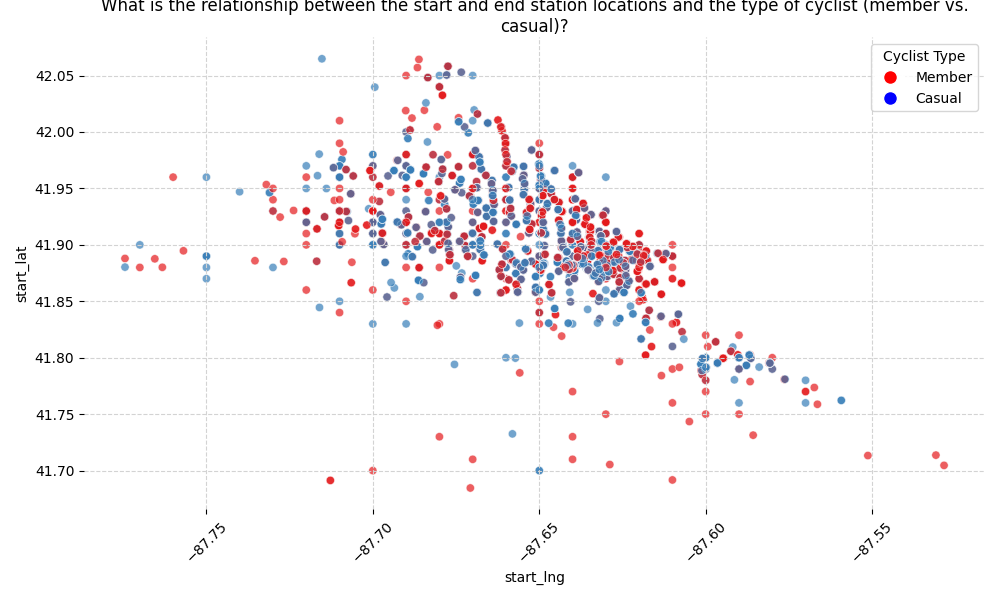

In [55]:
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
goal13_charts = lida.visualize(summary=summary, goal=goals[13], textgen_config=textgen_config, library=library)  
goal13_charts[0]

# Generate Insight Goals

### Collecting Insights

In [112]:
# Collecting Insights

collected_insights = [
    goal15_insights[8],
    goal5_insights[1],
    goal0_insights[6]
]

for insight in collected_insights:
    display(insight)


### Insight 8
---
**Insight:** The overall pattern of ride counts suggests that casual riders may be more influenced by social or recreational factors, while members are driven by practical commuting needs, highlighting different motivations for bike usage.



### Insight 1
---
**Insight:** The contrast in usage patterns between casual riders and members highlights a potential segmentation in the biking community, where casual riders are more inclined to use bikes for leisure on weekends, while members may rely on biking as a consistent mode of transportation during the week.



### Insight 6
---
**Insight:** The data indicates that while both groups prefer classic bikes, the distinct preference for electric bikes among casual riders could suggest a potential pathway for converting casual riders into annual members by promoting the benefits of classic biking experiences.


### Insight Goal: Insight 6

The data indicates that while both groups prefer classic bikes, the distinct preference for electric bikes among casual riders could suggest a potential pathway for converting casual riders into annual members by promoting the benefits of classic biking experiences.

In [113]:
textgen_config = TextGenerationConfig(n=1, temperature=0.5, presence_penalty=0.5, use_cache=False)
goal0_insight6_goals = lida.goals(summary=summary, n=5, textgen_config=textgen_config, goal=personal_goals[0], prompts=goal0_prompts, insights=[goal0_insights[6]], answers=goal0_answers)

for insight_goal in goal0_insight6_goals:
    display(insight_goal)


You are an experienced data analyst who can generate a given number of insightful GOALS about INSIGHTS that a user has about their data that will allow them to explore their INSIGHT deeper and make meaningful connections between them and their data. The VISUALIZATIONS YOU RECOMMEND MUST FOLLOW VISUALIZATION BEST PRACTICES (e.g., must use bar charts instead of pie charts for comparing quantities) AND BE MEANINGFUL (e.g., plot longitude and latitude on maps where appropriate). They must also be relevant to the specified persona AND always be related to the insight of the user. Each goal must include a question (THE QUESTION MUST REFERENCE A PART OF AN INSIGHT), a visualization (THE VISUALIZATION MUST REFERENCE THE EXACT COLUMN FIELDS FROM THE SUMMARY), and a rationale (JUSTIFICATION FOR WHICH dataset FIELDS ARE USED, what we will learn from the visualization AND how the question can allow the user to explore their insights deeper). Each goal MUST mention the exact fields from the datase


### Goal 0
---
**Question:** How does the frequency of rideable type usage vary by time of day for casual riders compared to annual members?

**Visualization:** `line chart of count of rideable_type over hour of day, grouped by member_casual`

**Rationale:** This visualization will reveal patterns in bike usage throughout the day, allowing us to see if casual riders prefer electric bikes during specific times compared to classic bikes used by annual members. Understanding these trends can help tailor promotional strategies to convert casual riders into annual members, aligning with the user's insight about the potential pathway for membership.



### Goal 1
---
**Question:** What are the most popular start stations for each rideable type among casual riders versus annual members?

**Visualization:** `bar chart of start_station_name grouped by rideable_type and member_casual`

**Rationale:** This visualization will highlight the preferences for start stations based on rideable type and membership status. By analyzing which stations are favored by casual riders for electric bikes versus classic bikes used by members, we can identify strategic locations for marketing efforts aimed at converting casual riders to members, thereby deepening our understanding of the user's insight.



### Goal 2
---
**Question:** What is the average ride duration for casual riders using electric bikes compared to annual members using classic bikes?

**Visualization:** `box plot of ride duration (calculated from started_at and ended_at) grouped by rideable_type and member_casual`

**Rationale:** This visualization will provide insights into how ride duration varies between different bike types and membership categories. If casual riders using electric bikes have significantly shorter rides than members using classic bikes, it may indicate a difference in riding behavior that could inform targeted promotions to encourage longer rides and potential membership conversion.



### Goal 3
---
**Question:** Is there a correlation between the distance traveled and the rideable type used by casual riders versus annual members?

**Visualization:** `scatter plot of distance (calculated from start_lat, start_lng, end_lat, end_lng) versus rideable_type, colored by member_casual`

**Rationale:** This visualization will explore the relationship between the distance traveled and the type of bike used by each membership category. Understanding whether casual riders tend to travel shorter distances on electric bikes compared to classic bike users can provide insights into their riding habits and preferences, helping to validate or challenge the user's insights about potential pathways for membership.



### Goal 4
---
**Question:** What percentage of total rides does each rideable type represent for casual riders compared to annual members?

**Visualization:** `stacked bar chart of percentage of total rides by rideable_type, segmented by member_casual`

**Rationale:** This visualization will clearly illustrate the proportion of each rideable type used by casual riders versus annual members. By identifying the dominance of classic bikes among members and the significant preference for electric bikes among casual riders, we can derive actionable insights for marketing strategies that leverage these preferences to encourage casual riders to transition into annual memberships.


### Insight Goal: Goal 15

The overall pattern of ride counts suggests that casual riders may be more influenced by social or recreational factors, while members are driven by practical commuting needs, highlighting different motivations for bike usage.

In [114]:
textgen_config = TextGenerationConfig(n=1, temperature=0.5, presence_penalty=0.5, use_cache=False)
goal15_insight8_goals = lida.goals(summary=summary, n=5, textgen_config=textgen_config, goal=personal_goals[15], prompts=goal15_prompts, insights=[goal15_insights[8]], answers=goal15_answers)

for insight_goal in goal15_insight8_goals:
    display(insight_goal)


You are an experienced data analyst who can generate a given number of insightful GOALS about INSIGHTS that a user has about their data that will allow them to explore their INSIGHT deeper and make meaningful connections between them and their data. The VISUALIZATIONS YOU RECOMMEND MUST FOLLOW VISUALIZATION BEST PRACTICES (e.g., must use bar charts instead of pie charts for comparing quantities) AND BE MEANINGFUL (e.g., plot longitude and latitude on maps where appropriate). They must also be relevant to the specified persona AND always be related to the insight of the user. Each goal must include a question (THE QUESTION MUST REFERENCE A PART OF AN INSIGHT), a visualization (THE VISUALIZATION MUST REFERENCE THE EXACT COLUMN FIELDS FROM THE SUMMARY), and a rationale (JUSTIFICATION FOR WHICH dataset FIELDS ARE USED, what we will learn from the visualization AND how the question can allow the user to explore their insights deeper). Each goal MUST mention the exact fields from the datase


### Goal 0
---
**Question:** How do ride counts for casual riders compare to members during specific peak hours, specifically at 7:00 and 18:00?

**Visualization:** `bar chart comparing ride counts at 7:00 and 18:00 segmented by member_casual`

**Rationale:** This visualization will help us understand the differences in usage patterns during critical times of the day. By focusing on the peak hours identified in the user's insights, we can analyze how casual riders are more influenced by social factors compared to members who may be commuting. This could reveal whether casual riders are utilizing bikes for recreational purposes during peak times, which is crucial for optimizing bike availability and marketing strategies.



### Goal 1
---
**Question:** What percentage of rides taken by casual users occur during non-peak hours (e.g., 4:00 to 6:00) compared to members?

**Visualization:** `stacked bar chart showing the percentage of rides by member_casual during peak vs. non-peak hours`

**Rationale:** This visualization will allow us to explore the distribution of rides between casual and member users during off-peak hours, highlighting their differing motivations. Understanding the lower usage of casual riders during these hours can help identify opportunities for targeted campaigns or promotional offers to increase engagement, thus validating the insight about their social or recreational riding patterns.



### Goal 2
---
**Question:** Is there a correlation between the type of bike used (rideable_type) and the peak hours of usage for casual versus member riders?

**Visualization:** `line chart showing ride counts over time segmented by rideable_type and member_casual`

**Rationale:** This visualization will help determine if specific bike types are favored by either casual riders or members during peak hours. If casual riders prefer electric bikes during recreational times, while members lean towards classic bikes for commuting, this could provide insights into user preferences and help improve bike fleet management. This directly ties back to the user's insight about different motivations for bike usage.



### Goal 3
---
**Question:** How does the average duration of rides for casual users compare to members during peak commuting hours (e.g., 7:00 to 9:00)?

**Visualization:** `box plot comparing average ride duration during peak hours segmented by member_casual`

**Rationale:** This visualization will provide insights into how ride durations differ between casual and member users during the morning rush. If casual riders have shorter ride durations compared to members, it could reinforce the idea that members are using bikes primarily for commuting. Understanding these patterns could help in tailoring services or offers specifically designed for each group, further exploring the user's insight regarding their motivations.



### Goal 4
---
**Question:** What are the most popular start and end stations for casual riders compared to members during the identified peak hours?

**Visualization:** `heatmap showing ride counts by start and end station segmented by member_casual`

**Rationale:** This visualization will highlight the geographical preferences of casual versus member riders during peak times. Identifying popular stations can inform strategic placement of bikes and resources, as well as help in planning future station developments. By examining these patterns, we can delve deeper into the motivations behind the users' choices and validate the insight regarding their differing usage behaviors.


### Insight Goals: Goal 15 and Goal 5

In [119]:
textgen_config = TextGenerationConfig(n=1, temperature=0.5, presence_penalty=0.5, use_cache=False)
goal15_insight8_goals = lida.goals(summary=summary, n=5, textgen_config=textgen_config, goal=personal_goals[15], prompts=goal15_prompts, insights=[goal15_insights[8], goal5_insights[1]], answers=goal15_answers)

for insight_goal in goal15_insight8_goals:
    display(insight_goal)


You are an experienced data analyst who can generate a given number of insightful GOALS about INSIGHTS that a user has about their data that will allow them to explore their INSIGHT deeper and make meaningful connections between them and their data. The VISUALIZATIONS YOU RECOMMEND MUST FOLLOW VISUALIZATION BEST PRACTICES (e.g., must use bar charts instead of pie charts for comparing quantities) AND BE MEANINGFUL (e.g., plot longitude and latitude on maps where appropriate). They must also be relevant to the specified persona AND always be related to the insight of the user. Each goal must include a question (THE QUESTION MUST REFERENCE A PART OF AN INSIGHT), a visualization (THE VISUALIZATION MUST REFERENCE THE EXACT COLUMN FIELDS FROM THE SUMMARY), and a rationale (JUSTIFICATION FOR WHICH dataset FIELDS ARE USED, what we will learn from the visualization AND how the question can allow the user to explore their insights deeper). Each goal MUST mention the exact fields from the datase


### Goal 0
---
**Question:** How do ride counts differ between casual riders and members across different types of bikes?

**Visualization:** `bar chart comparing ride counts by rideable_type, segmented by member_casual`

**Rationale:** This visualization uses the 'rideable_type' and 'member_casual' fields to compare how different bike types are utilized by casual riders versus members. Understanding which types of bikes are preferred by each group can provide insight into their motivations for biking, supporting the insight that casual riders may be more influenced by recreational factors while members rely on practical commuting needs.



### Goal 1
---
**Question:** What is the average duration of rides for casual riders compared to members during peak hours?

**Visualization:** `box plot of ride durations segmented by member_casual during peak hours (17:00-18:00)`

**Rationale:** This visualization will utilize the 'started_at' and 'ended_at' fields to calculate ride durations and segment them by 'member_casual' during the identified peak hours. Analyzing ride duration can reveal whether casual riders are using bikes for shorter leisure trips compared to longer commutes by members, thus allowing for a deeper understanding of their differing motivations.



### Goal 2
---
**Question:** Which stations are most frequently used by casual riders compared to members during weekends?

**Visualization:** `heatmap of start_station_name usage segmented by member_casual for weekend rides`

**Rationale:** Using the 'start_station_name' field, this heatmap will visualize the frequency of bike usage at different stations for casual riders and members on weekends. This can help identify popular leisure destinations for casual riders and commuting hubs for members, aligning with the insight about usage patterns and segmentation in the biking community.



### Goal 3
---
**Question:** What trends can we observe in the distribution of ride counts among casual riders and members across weekdays versus weekends?

**Visualization:** `stacked bar chart of ride counts by day of the week, segmented by member_casual`

**Rationale:** This visualization will leverage the 'started_at' field to extract the day of the week for each ride, allowing us to compare ride counts between casual riders and members. By visualizing this data, we can confirm the hypothesis that casual riders are more active on weekends while members maintain consistent usage throughout the week, further exploring the segmentation of the biking community.



### Goal 4
---
**Question:** What is the relationship between ride counts and the time of day for casual riders and members?

**Visualization:** `scatter plot of ride counts by hour of the day, colored by member_casual`

**Rationale:** This scatter plot will utilize the 'started_at' field to analyze ride counts across different hours of the day for both casual riders and members. This visualization will help us explore the specific times when the gap in usage is largest, providing insights into how time influences biking behavior and confirming patterns observed in previous analyses.
